Indrouces noise due to Y gate for quantum to classical map ... explain

In [1]:
!pip3 install --upgrade pip
!pip3 install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 57.3 MB/s  0:00:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 106.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 195.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 148.6 MB/s  0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstal

In [2]:
!pip3 install -U tensorflow-quantum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.5 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 44.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 76.5 MB/s  0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [tensorflow-quantum]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.5 whi

In [ ]:
!pip3 install -U tfq-nightly

ERROR: Could not find a version that satisfies the requirement tfq-nightly (from versions: none)
ERROR: No matching distribution found for tfq-nightly


11490434/11490434 [==============================] - 0s 0us/step
Training set shape: (3000, 28, 28)
Training labels shape: (3000,)
Test set shape: (3147, 28, 28)
Test labels shape: (3147,)
Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 0.7764 - accuracy: 0.7204 
Epoch 1: val_loss improved from inf to 1.68142, saving model to best_model_mnist_3_1000_noise_0.02.h5
19/19 [==============================] - 204s 11s/step - loss: 0.7764 - accuracy: 0.7204 - val_loss: 1.6814 - val_accuracy: 0.0283 - lr: 0.0098
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.6378 - accuracy: 0.7696 
Epoch 2: val_loss improved from 1.68142 to 1.35331, saving model to best_model_mnist_3_1000_noise_0.02.h5
19/19 [==============================] - 206s 11s/step - loss: 0.6378 - accuracy: 0.7696 - val_loss: 1.3533 - val_accuracy: 0.2550 - lr: 0.0096
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.5643 - accuracy: 0.7867 
Epoch 3: val_loss improved fro

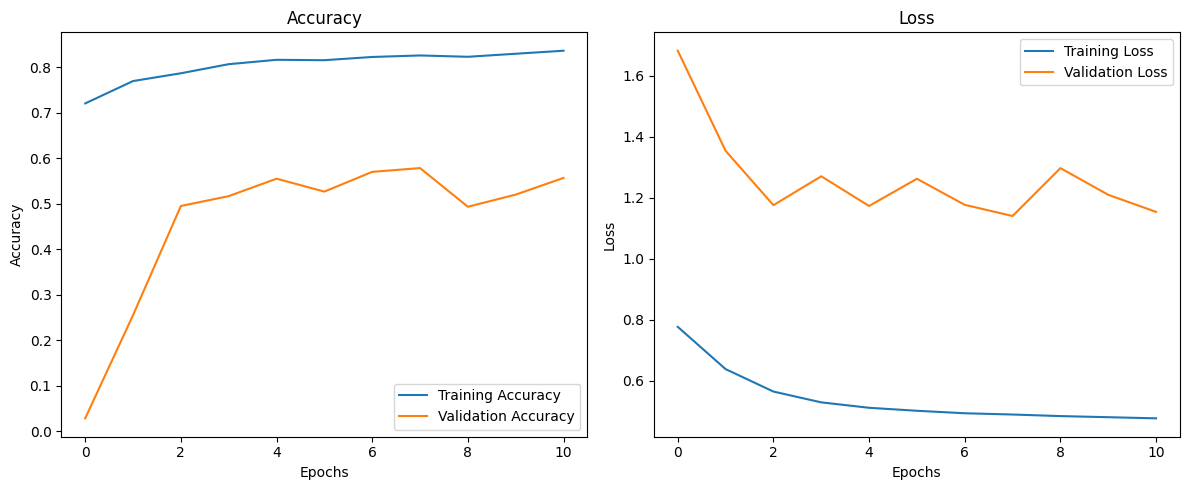

99/99 [==============================] - 38s 382ms/step


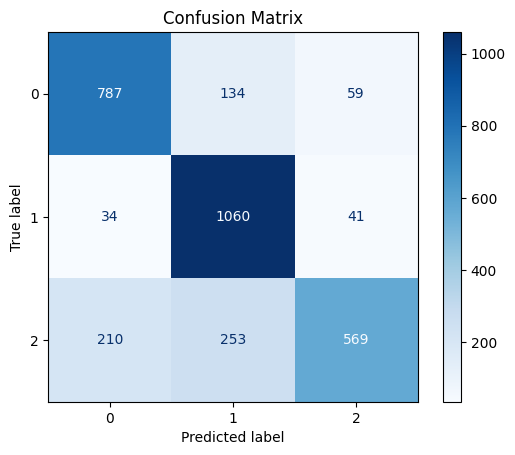

Precision: 0.7808
Recall: 0.7677
F1 Score: 0.7593


In [1]:
# 3 CLASS MNIST 1000 TRAINING SAMPLE ; NOISE = 0.02
#
# =============================================================
# Imports
# =============================================================
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# =============================================================
# Load and preprocess dataset
# =============================================================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

selected_classes = [0, 1, 2]  # Digits 0 and 1
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Limit number of training samples per class
class_limit = 1000
x_train_limited, y_train_limited = [], []

for cls in selected_classes:
    cls_indices = np.where(y_train == cls)[0][:class_limit]
    x_train_limited.append(x_train[cls_indices])
    y_train_limited.append(y_train[cls_indices])

x_train = np.concatenate(x_train_limited)
y_train = np.concatenate(y_train_limited)

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Resize images to 4x4 grid for 16 qubits
def preprocess_images(images, size=4):
    images = tf.image.resize(images[..., tf.newaxis], (size, size)).numpy()
    return images.reshape(-1, size**2)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# =============================================================
# Quantum Circuit Definitions
# =============================================================

# Create qubits and parameters
n_qubits = 16
layers = 3
qubits = [cirq.GridQubit(i, 0) for i in range(n_qubits)]
params = sympy.symbols(f'theta_0:{3*n_qubits*layers}')

# Define parameterized variational circuit
def create_quantum_circuit(qubits, params,layers):
    circuit = cirq.Circuit()
    for layer_num in range(layers):
      for i, qubit in enumerate(qubits):
          circuit.append(cirq.rz(params[i + layer_num] )(qubit))
          circuit.append(cirq.ry(params[i + len(qubits) + layer_num ] )(qubit))
          circuit.append(cirq.rz(params[i + 2*len(qubits) + 3*len(qubits)  + layer_num ])(qubit))
      for i in range(len(qubits) - 1):
          circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))
    return circuit





# Create example parameterized circuit
example_circuit = create_quantum_circuit(qubits, params, layers)

# =============================================================
# Noisy data encoding (adds Gaussian phase/amplitude noise)
# =============================================================
def create_quantum_data(images, noise_std=0.02):
    circuits = []
    for image in images:
        circuit = cirq.Circuit()
        for i, pixel in enumerate(image):
            noisy_pixel = pixel + np.random.normal(0, noise_std)
            noisy_pixel = np.clip(noisy_pixel, 0.0, 1.0)
            circuit.append(cirq.rx(np.pi * noisy_pixel)(qubits[i % n_qubits]))
        circuits.append(circuit)
    return tfq.convert_to_tensor(circuits)

# Convert datasets to noisy quantum circuits
x_train_circuits = create_quantum_data(x_train, noise_std=0.02)
x_test_circuits  = create_quantum_data(x_test, noise_std=0.00)

# =============================================================
# Model Definition
# =============================================================
def create_model():
    quantum_input = tf.keras.Input(shape=(), dtype=tf.string, name='quantum_input')
    quantum_layer = tfq.layers.PQC(example_circuit, [cirq.Z(q) for q in qubits])(quantum_input)
    output = tf.keras.layers.Dense(len(selected_classes), activation="softmax")(quantum_layer)
    model = tf.keras.Model(inputs=quantum_input, outputs=output, name='Quantum_Classifier')
    return model

# Learning rate and callbacks
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100, decay_rate=0.9
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_mnist_3_1000_noise_0.02.h5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# =============================================================
# Compile and Train
# =============================================================
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_circuits, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[model_checkpoint, reduce_lr, early_stopping],
    verbose=1
)

model.load_weights("best_model_mnist_3_1000_noise_0.02.h5")

# =============================================================
# Evaluation
# =============================================================
loss, accuracy = model.evaluate(x_test_circuits, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# =============================================================
# Visualization
# =============================================================
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test_circuits), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=range(len(selected_classes)))
ConfusionMatrixDisplay(cm, display_labels=selected_classes).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# =============================================================
# Metrics
# =============================================================
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


4422102/4422102 [==============================] - 0s 0us/step
Training set shape: (3000, 28, 28)
Training labels shape: (3000,)
Test set shape: (3000, 28, 28)
Test labels shape: (3000,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.9906 - accuracy: 0.5258 
Epoch 1: val_loss improved from inf to 1.76062, saving model to best_model_f_mnist_3_1000_noise_0.02.h5
19/19 [==============================] - 205s 11s/step - loss: 0.9906 - accuracy: 0.5258 - val_loss: 1.7606 - val_accuracy: 0.0183 - lr: 0.0098
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.8963 - accuracy: 0.5942 
Epoch 2: val_loss improved from 1.76062 to 1.55439, saving model to best_model_f_mnist_3_1000_noise_0.02.h5
19/19 [==============================] - 204s 11s/step - loss: 0.8963 - accuracy: 0.5942 - val_loss: 1.5544 - val_accuracy: 0.0883 - lr: 0.0096
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.8085 - accuracy: 0.6429 
Epoch 3: val_loss improved from 1.55439 to 1.43738, saving model to best_model_f_mnist_3_1000_noise_0.02.h5
19/19 [==============================] - 202s 11s/step - loss: 0.8085 - accuracy: 0.6429 - val_loss: 1.4374 - val_accu

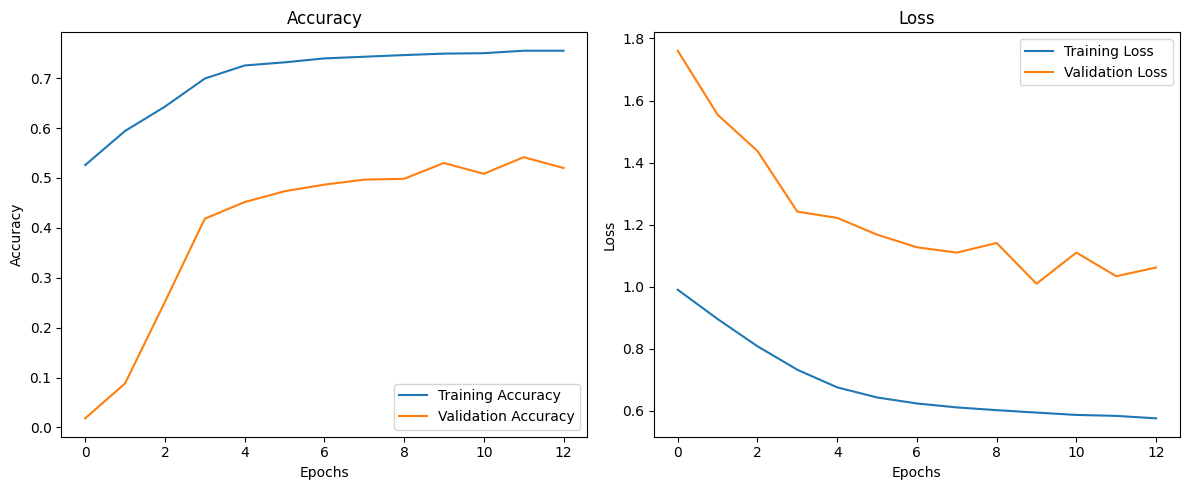

94/94 [==============================] - 36s 377ms/step


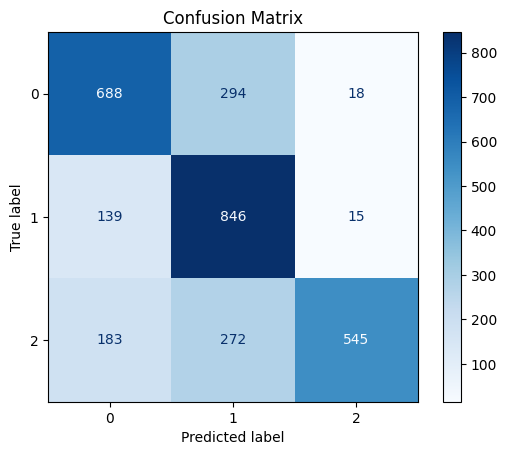

Precision: 0.7411
Recall: 0.6930
F1 Score: 0.6923


In [2]:
# FASHION MNIST 3 CLASSES 1000 TAINING SAMPLES , NOISE =0.02
#
# =============================================================
# Imports
# =============================================================
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# =============================================================
# Load and preprocess dataset
# =============================================================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

selected_classes = [0, 1, 2]  # Digits 0 and 1
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Limit number of training samples per class
class_limit = 1000
x_train_limited, y_train_limited = [], []

for cls in selected_classes:
    cls_indices = np.where(y_train == cls)[0][:class_limit]
    x_train_limited.append(x_train[cls_indices])
    y_train_limited.append(y_train[cls_indices])

x_train = np.concatenate(x_train_limited)
y_train = np.concatenate(y_train_limited)

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Resize images to 4x4 grid for 16 qubits
def preprocess_images(images, size=4):
    images = tf.image.resize(images[..., tf.newaxis], (size, size)).numpy()
    return images.reshape(-1, size**2)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# =============================================================
# Quantum Circuit Definitions
# =============================================================

# Create qubits and parameters
n_qubits = 16
layers = 3
qubits = [cirq.GridQubit(i, 0) for i in range(n_qubits)]
params = sympy.symbols(f'theta_0:{3*n_qubits*layers}')

# Define parameterized variational circuit
def create_quantum_circuit(qubits, params,layers):
    circuit = cirq.Circuit()
    for layer_num in range(layers):
      for i, qubit in enumerate(qubits):
          circuit.append(cirq.rz(params[i + layer_num] )(qubit))
          circuit.append(cirq.ry(params[i + len(qubits) + layer_num ] )(qubit))
          circuit.append(cirq.rz(params[i + 2*len(qubits) + 3*len(qubits)  + layer_num ])(qubit))
      for i in range(len(qubits) - 1):
          circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))
    return circuit





# Create example parameterized circuit
example_circuit = create_quantum_circuit(qubits, params, layers)

# =============================================================
# Noisy data encoding (adds Gaussian phase/amplitude noise)
# =============================================================
def create_quantum_data(images, noise_std=0.02):
    circuits = []
    for image in images:
        circuit = cirq.Circuit()
        for i, pixel in enumerate(image):
            noisy_pixel = pixel + np.random.normal(0, noise_std)
            noisy_pixel = np.clip(noisy_pixel, 0.0, 1.0)
            circuit.append(cirq.rx(np.pi * noisy_pixel)(qubits[i % n_qubits]))
        circuits.append(circuit)
    return tfq.convert_to_tensor(circuits)

# Convert datasets to noisy quantum circuits
x_train_circuits = create_quantum_data(x_train, noise_std=0.02)
x_test_circuits  = create_quantum_data(x_test, noise_std=0.00)

# =============================================================
# Model Definition
# =============================================================
def create_model():
    quantum_input = tf.keras.Input(shape=(), dtype=tf.string, name='quantum_input')
    quantum_layer = tfq.layers.PQC(example_circuit, [cirq.Z(q) for q in qubits])(quantum_input)
    output = tf.keras.layers.Dense(len(selected_classes), activation="softmax")(quantum_layer)
    model = tf.keras.Model(inputs=quantum_input, outputs=output, name='Quantum_Classifier')
    return model

# Learning rate and callbacks
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100, decay_rate=0.9
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_f_mnist_3_1000_noise_0.02.h5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# =============================================================
# Compile and Train
# =============================================================
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_circuits, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[model_checkpoint, reduce_lr, early_stopping],
    verbose=1
)

model.load_weights("best_model_f_mnist_3_1000_noise_0.02.h5")

# =============================================================
# Evaluation
# =============================================================
loss, accuracy = model.evaluate(x_test_circuits, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# =============================================================
# Visualization
# =============================================================
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test_circuits), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=range(len(selected_classes)))
ConfusionMatrixDisplay(cm, display_labels=selected_classes).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# =============================================================
# Metrics
# =============================================================
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training set shape: (3000, 28, 28)
Training labels shape: (3000,)
Test set shape: (3000, 28, 28)
Test labels shape: (3000,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 1.0973 - accuracy: 0.4762 
Epoch 1: val_loss improved from inf to 1.64722, saving model to best_model_f_mnist_3_1000_noise_0.03.h5
19/19 [==============================] - 220s 12s/step - loss: 1.0973 - accuracy: 0.4762 - val_loss: 1.6472 - val_accuracy: 0.0267 - lr: 0.0098
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.9146 - accuracy: 0.5967 
Epoch 2: val_loss did not improve from 1.64722
19/19 [==============================] - 203s 11s/step - loss: 0.9146 - accuracy: 0.5967 - val_loss: 1.7784 - val_accuracy: 0.0183 - lr: 0.0096
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.8461 - accuracy: 0.6204 
Epoch 3: val_loss improved from 1.64722 to 1.50773, saving model to best_model_f_mnist_3_1000_noise_0.03.h5
19/19 [==============================] - 204s 11s/step - loss: 0.8461 - accuracy: 0.6204 - val_loss: 1.5077 - val_accuracy: 0.1350 - lr: 0.0094
Epoch 4/50
19/19 [=================

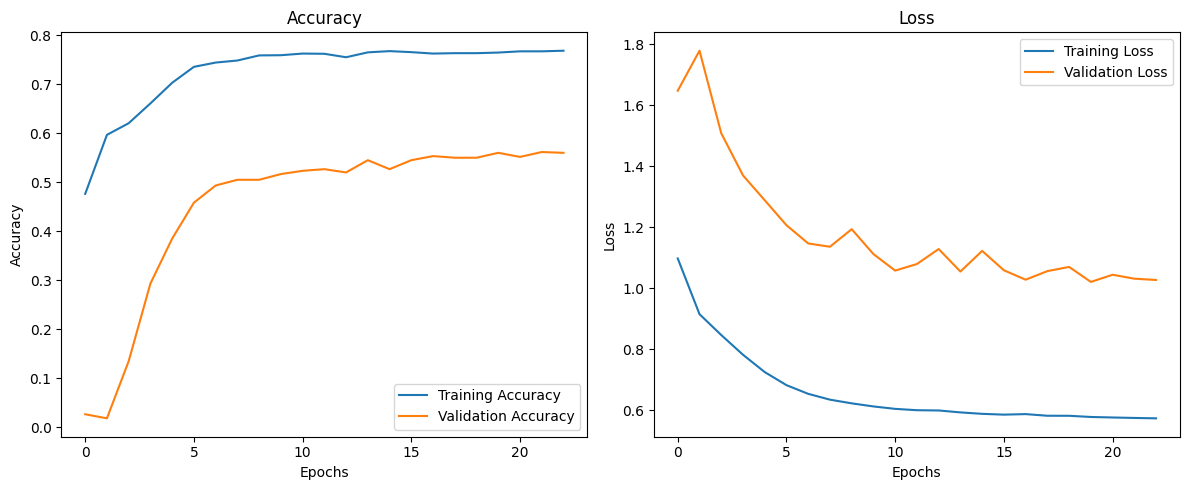

94/94 [==============================] - 36s 384ms/step


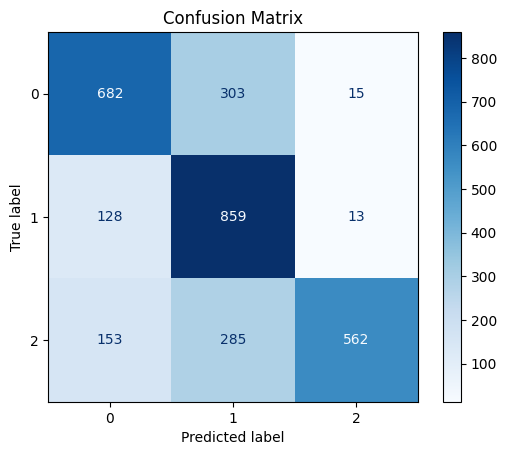

Precision: 0.7515
Recall: 0.7010
F1 Score: 0.7013


In [3]:
# FASHION MNIST 3 CLASSES 1000 TRAINING SAMPLES ; NOISE = 0.03 [ run ]
#
# =============================================================
# Imports
# =============================================================
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# =============================================================
# Load and preprocess dataset
# =============================================================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

selected_classes = [0, 1, 2]  # Digits 0 and 1
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Limit number of training samples per class
class_limit = 1000
x_train_limited, y_train_limited = [], []

for cls in selected_classes:
    cls_indices = np.where(y_train == cls)[0][:class_limit]
    x_train_limited.append(x_train[cls_indices])
    y_train_limited.append(y_train[cls_indices])

x_train = np.concatenate(x_train_limited)
y_train = np.concatenate(y_train_limited)

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Resize images to 4x4 grid for 16 qubits
def preprocess_images(images, size=4):
    images = tf.image.resize(images[..., tf.newaxis], (size, size)).numpy()
    return images.reshape(-1, size**2)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# =============================================================
# Quantum Circuit Definitions
# =============================================================

# Create qubits and parameters
n_qubits = 16
layers = 3
qubits = [cirq.GridQubit(i, 0) for i in range(n_qubits)]
params = sympy.symbols(f'theta_0:{3*n_qubits*layers}')

# Define parameterized variational circuit
def create_quantum_circuit(qubits, params,layers):
    circuit = cirq.Circuit()
    for layer_num in range(layers):
      for i, qubit in enumerate(qubits):
          circuit.append(cirq.rz(params[i + layer_num] )(qubit))
          circuit.append(cirq.ry(params[i + len(qubits) + layer_num ] )(qubit))
          circuit.append(cirq.rz(params[i + 2*len(qubits) + 3*len(qubits)  + layer_num ])(qubit))
      for i in range(len(qubits) - 1):
          circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))
    return circuit





# Create example parameterized circuit
example_circuit = create_quantum_circuit(qubits, params, layers)



# =============================================================
# Noisy data encoding (adds Gaussian phase/amplitude noise)
# =============================================================
def create_quantum_data(images, noise_std=0.03):
    circuits = []
    for image in images:
        circuit = cirq.Circuit()
        for i, pixel in enumerate(image):
            noisy_pixel = pixel + np.random.normal(0, noise_std)
            noisy_pixel = np.clip(noisy_pixel, 0.0, 1.0)
            circuit.append(cirq.rx(np.pi * noisy_pixel)(qubits[i % n_qubits]))
        circuits.append(circuit)
    return tfq.convert_to_tensor(circuits)

# Convert datasets to noisy quantum circuits
x_train_circuits = create_quantum_data(x_train, noise_std=0.03)
x_test_circuits  = create_quantum_data(x_test, noise_std=0.00)

# =============================================================
# Model Definition
# =============================================================
def create_model():
    quantum_input = tf.keras.Input(shape=(), dtype=tf.string, name='quantum_input')
    quantum_layer = tfq.layers.PQC(example_circuit, [cirq.Z(q) for q in qubits])(quantum_input)
    output = tf.keras.layers.Dense(len(selected_classes), activation="softmax")(quantum_layer)
    model = tf.keras.Model(inputs=quantum_input, outputs=output, name='Quantum_Classifier')
    return model

# Learning rate and callbacks
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100, decay_rate=0.9
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_f_mnist_3_1000_noise_0.03.h5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# =============================================================
# Compile and Train
# =============================================================
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_circuits, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[model_checkpoint, reduce_lr, early_stopping],
    verbose=1
)

model.load_weights("best_model_f_mnist_3_1000_noise_0.03.h5")

# =============================================================
# Evaluation
# =============================================================
loss, accuracy = model.evaluate(x_test_circuits, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# =============================================================
# Visualization
# =============================================================
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test_circuits), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=range(len(selected_classes)))
ConfusionMatrixDisplay(cm, display_labels=selected_classes).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# =============================================================
# Metrics
# =============================================================
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training set shape: (3000, 28, 28)
Training labels shape: (3000,)
Test set shape: (3147, 28, 28)
Test labels shape: (3147,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.7781 - accuracy: 0.7237 
Epoch 1: val_loss improved from inf to 1.61333, saving model to best_model_mnist_3_1000_noise_0.03.h5
19/19 [==============================] - 201s 11s/step - loss: 0.7781 - accuracy: 0.7237 - val_loss: 1.6133 - val_accuracy: 0.0617 - lr: 0.0098
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.6366 - accuracy: 0.7817 
Epoch 2: val_loss improved from 1.61333 to 1.22323, saving model to best_model_mnist_3_1000_noise_0.03.h5
19/19 [==============================] - 204s 11s/step - loss: 0.6366 - accuracy: 0.7817 - val_loss: 1.2232 - val_accuracy: 0.5917 - lr: 0.0096
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.5712 - accuracy: 0.8125 
Epoch 3: val_loss did not improve from 1.22323
19/19 [==============================] - 203s 11s/step - loss: 0.5712 - accuracy: 0.8125 - val_loss: 1.2464 - val_accuracy: 0.5883 - lr: 0.0094
Epoch 4/50
19/19 [=====================

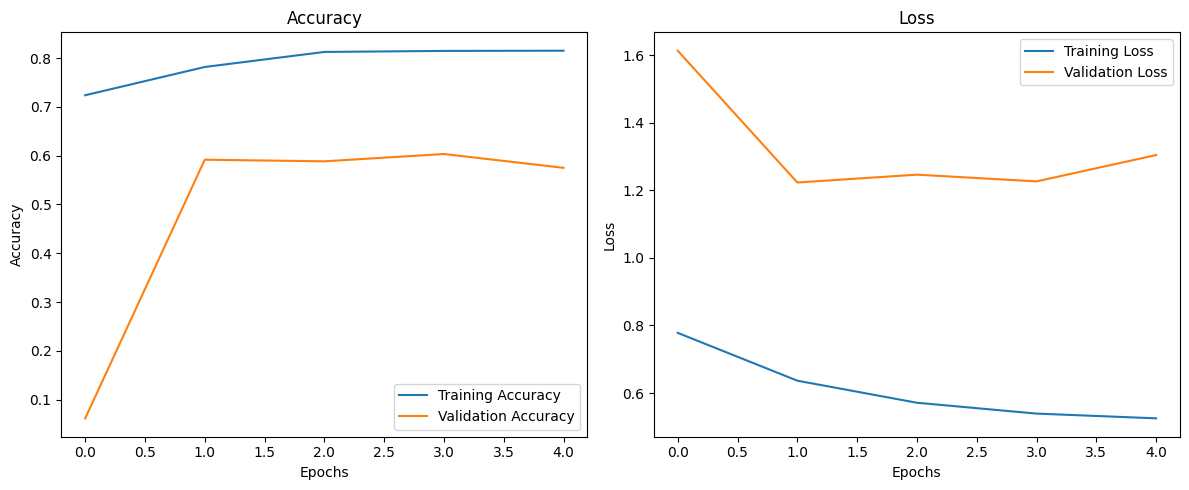

99/99 [==============================] - 38s 384ms/step


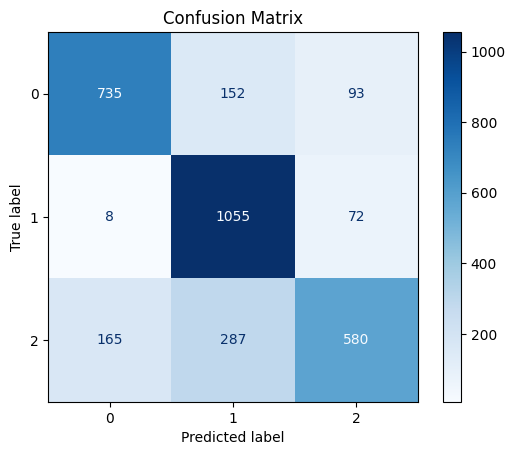

Precision: 0.7621
Recall: 0.7531
F1 Score: 0.7460


In [4]:
# MNIST 3 CLASSES 1000 TRAINING SAMPLE ; NOISE = 0.03
#

# =============================================================
# Imports
# =============================================================
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# =============================================================
# Load and preprocess dataset
# =============================================================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

selected_classes = [0, 1, 2]  # Digits 0 and 1
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Limit number of training samples per class
class_limit = 1000
x_train_limited, y_train_limited = [], []

for cls in selected_classes:
    cls_indices = np.where(y_train == cls)[0][:class_limit]
    x_train_limited.append(x_train[cls_indices])
    y_train_limited.append(y_train[cls_indices])

x_train = np.concatenate(x_train_limited)
y_train = np.concatenate(y_train_limited)

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Resize images to 4x4 grid for 16 qubits
def preprocess_images(images, size=4):
    images = tf.image.resize(images[..., tf.newaxis], (size, size)).numpy()
    return images.reshape(-1, size**2)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# =============================================================
# Quantum Circuit Definitions
# =============================================================

# Create qubits and parameters
n_qubits = 16
layers = 3
qubits = [cirq.GridQubit(i, 0) for i in range(n_qubits)]
params = sympy.symbols(f'theta_0:{3*n_qubits*layers}')

# Define parameterized variational circuit
def create_quantum_circuit(qubits, params,layers):
    circuit = cirq.Circuit()
    for layer_num in range(layers):
      for i, qubit in enumerate(qubits):
          circuit.append(cirq.rz(params[i + layer_num] )(qubit))
          circuit.append(cirq.ry(params[i + len(qubits) + layer_num ] )(qubit))
          circuit.append(cirq.rz(params[i + 2*len(qubits) + 3*len(qubits)  + layer_num ])(qubit))
      for i in range(len(qubits) - 1):
          circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))
    return circuit





# Create example parameterized circuit
example_circuit = create_quantum_circuit(qubits, params, layers)

# =============================================================
# Noisy data encoding (adds Gaussian phase/amplitude noise)
# =============================================================
def create_quantum_data(images, noise_std=0.03):
    circuits = []
    for image in images:
        circuit = cirq.Circuit()
        for i, pixel in enumerate(image):
            noisy_pixel = pixel + np.random.normal(0, noise_std)
            noisy_pixel = np.clip(noisy_pixel, 0.0, 1.0)
            circuit.append(cirq.rx(np.pi * noisy_pixel)(qubits[i % n_qubits]))
        circuits.append(circuit)
    return tfq.convert_to_tensor(circuits)

# Convert datasets to noisy quantum circuits
x_train_circuits = create_quantum_data(x_train, noise_std=0.03)
x_test_circuits  = create_quantum_data(x_test, noise_std=0.00)

# =============================================================
# Model Definition
# =============================================================
def create_model():
    quantum_input = tf.keras.Input(shape=(), dtype=tf.string, name='quantum_input')
    quantum_layer = tfq.layers.PQC(example_circuit, [cirq.Z(q) for q in qubits])(quantum_input)
    output = tf.keras.layers.Dense(len(selected_classes), activation="softmax")(quantum_layer)
    model = tf.keras.Model(inputs=quantum_input, outputs=output, name='Quantum_Classifier')
    return model

# Learning rate and callbacks
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100, decay_rate=0.9
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_mnist_3_1000_noise_0.03.h5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# =============================================================
# Compile and Train
# =============================================================
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_circuits, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[model_checkpoint, reduce_lr, early_stopping],
    verbose=1
)

model.load_weights("best_model_mnist_3_1000_noise_0.03.h5")

# =============================================================
# Evaluation
# =============================================================
loss, accuracy = model.evaluate(x_test_circuits, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# =============================================================
# Visualization
# =============================================================
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test_circuits), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=range(len(selected_classes)))
ConfusionMatrixDisplay(cm, display_labels=selected_classes).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# =============================================================
# Metrics
# =============================================================
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training set shape: (3000, 28, 28)
Training labels shape: (3000,)
Test set shape: (3147, 28, 28)
Test labels shape: (3147,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 1.2394 - accuracy: 0.2950 
Epoch 1: val_loss improved from inf to 2.04062, saving model to best_model_mnist_3_1000_noise_0.04.h5
19/19 [==============================] - 206s 11s/step - loss: 1.2394 - accuracy: 0.2950 - val_loss: 2.0406 - val_accuracy: 0.0150 - lr: 0.0098
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.0235 - accuracy: 0.5421 
Epoch 2: val_loss improved from 2.04062 to 1.72463, saving model to best_model_mnist_3_1000_noise_0.04.h5
19/19 [==============================] - 200s 11s/step - loss: 1.0235 - accuracy: 0.5421 - val_loss: 1.7246 - val_accuracy: 0.0367 - lr: 0.0096
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.9063 - accuracy: 0.6050 
Epoch 3: val_loss improved from 1.72463 to 1.58610, saving model to best_model_mnist_3_1000_noise_0.04.h5
19/19 [==============================] - 204s 11s/step - loss: 0.9063 - accuracy: 0.6050 - val_loss: 1.5861 - val_accuracy: 

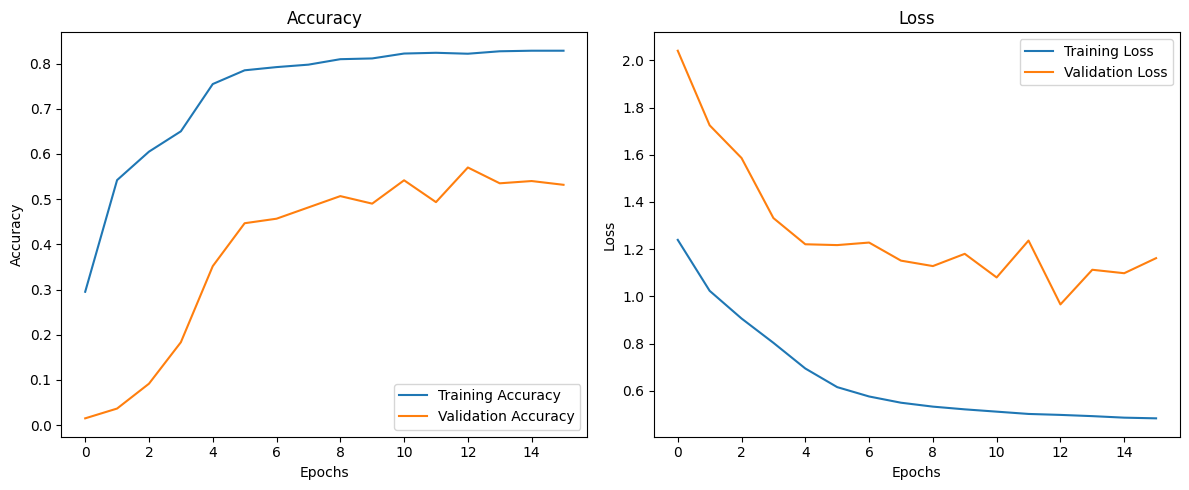

99/99 [==============================] - 38s 383ms/step


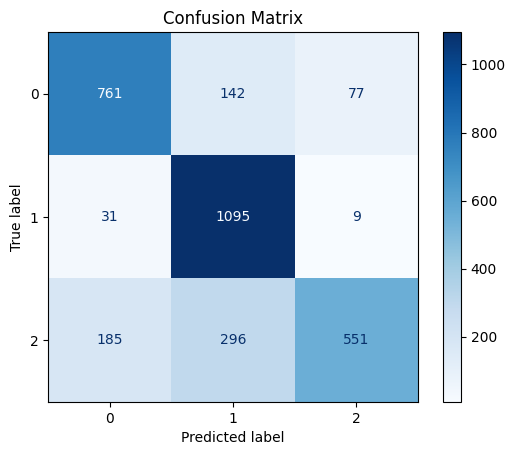

Precision: 0.7838
Recall: 0.7649
F1 Score: 0.7548


In [5]:
# MNIST 3 CLASSES 1000 TRINING SAMPLE ; NOISE 0.04 [ DON'T TAKE IT --GIVING HIGH RESULT ]
#
# =============================================================
# Imports
# =============================================================
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# =============================================================
# Load and preprocess dataset
# =============================================================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

selected_classes = [0, 1, 2]  # Digits 0 and 1
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Limit number of training samples per class
class_limit = 1000
x_train_limited, y_train_limited = [], []

for cls in selected_classes:
    cls_indices = np.where(y_train == cls)[0][:class_limit]
    x_train_limited.append(x_train[cls_indices])
    y_train_limited.append(y_train[cls_indices])

x_train = np.concatenate(x_train_limited)
y_train = np.concatenate(y_train_limited)

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Resize images to 4x4 grid for 16 qubits
def preprocess_images(images, size=4):
    images = tf.image.resize(images[..., tf.newaxis], (size, size)).numpy()
    return images.reshape(-1, size**2)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# =============================================================
# Quantum Circuit Definitions
# =============================================================

# Create qubits and parameters
n_qubits = 16
layers = 3
qubits = [cirq.GridQubit(i, 0) for i in range(n_qubits)]
params = sympy.symbols(f'theta_0:{3*n_qubits*layers}')

# Define parameterized variational circuit
def create_quantum_circuit(qubits, params,layers):
    circuit = cirq.Circuit()
    for layer_num in range(layers):
      for i, qubit in enumerate(qubits):
          circuit.append(cirq.rz(params[i + layer_num] )(qubit))
          circuit.append(cirq.ry(params[i + len(qubits) + layer_num ] )(qubit))
          circuit.append(cirq.rz(params[i + 2*len(qubits) + 3*len(qubits)  + layer_num ])(qubit))
      for i in range(len(qubits) - 1):
          circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))
    return circuit





# Create example parameterized circuit
example_circuit = create_quantum_circuit(qubits, params, layers)

# =============================================================
# Noisy data encoding (adds Gaussian phase/amplitude noise)
# =============================================================
def create_quantum_data(images, noise_std=0.04):
    circuits = []
    for image in images:
        circuit = cirq.Circuit()
        for i, pixel in enumerate(image):
            noisy_pixel = pixel + np.random.normal(0, noise_std)
            noisy_pixel = np.clip(noisy_pixel, 0.0, 1.0)
            circuit.append(cirq.rx(np.pi * noisy_pixel)(qubits[i % n_qubits]))
        circuits.append(circuit)
    return tfq.convert_to_tensor(circuits)

# Convert datasets to noisy quantum circuits
x_train_circuits = create_quantum_data(x_train, noise_std=0.04)
x_test_circuits  = create_quantum_data(x_test, noise_std=0.00)

# =============================================================
# Model Definition
# =============================================================
def create_model():
    quantum_input = tf.keras.Input(shape=(), dtype=tf.string, name='quantum_input')
    quantum_layer = tfq.layers.PQC(example_circuit, [cirq.Z(q) for q in qubits])(quantum_input)
    output = tf.keras.layers.Dense(len(selected_classes), activation="softmax")(quantum_layer)
    model = tf.keras.Model(inputs=quantum_input, outputs=output, name='Quantum_Classifier')
    return model

# Learning rate and callbacks
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100, decay_rate=0.9
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_mnist_3_1000_noise_0.04.h5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# =============================================================
# Compile and Train
# =============================================================
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_circuits, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[model_checkpoint, reduce_lr, early_stopping],
    verbose=1
)

model.load_weights("best_model_mnist_3_1000_noise_0.04.h5")

# =============================================================
# Evaluation
# =============================================================
loss, accuracy = model.evaluate(x_test_circuits, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# =============================================================
# Visualization
# =============================================================
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test_circuits), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=range(len(selected_classes)))
ConfusionMatrixDisplay(cm, display_labels=selected_classes).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# =============================================================
# Metrics
# =============================================================
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training set shape: (1500, 28, 28)
Training labels shape: (1500,)
Test set shape: (3000, 28, 28)
Test labels shape: (3000,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


10/10 [==============================] - ETA: 0s - loss: 1.1578 - accuracy: 0.3258 
Epoch 1: val_loss improved from inf to 1.71563, saving model to best_model_f_mnist_3_500_noise_0.04.h5
10/10 [==============================] - 100s 10s/step - loss: 1.1578 - accuracy: 0.3258 - val_loss: 1.7156 - val_accuracy: 0.0300 - lr: 0.0099
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.0552 - accuracy: 0.4392 
Epoch 2: val_loss did not improve from 1.71563
10/10 [==============================] - 100s 10s/step - loss: 1.0552 - accuracy: 0.4392 - val_loss: 1.7593 - val_accuracy: 0.0067 - lr: 0.0098
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.9990 - accuracy: 0.4933 
Epoch 3: val_loss did not improve from 1.71563
10/10 [==============================] - 101s 10s/step - loss: 0.9990 - accuracy: 0.4933 - val_loss: 1.7226 - val_accuracy: 0.0100 - lr: 0.0097
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.9572 - accuracy: 0.5242 
Ep

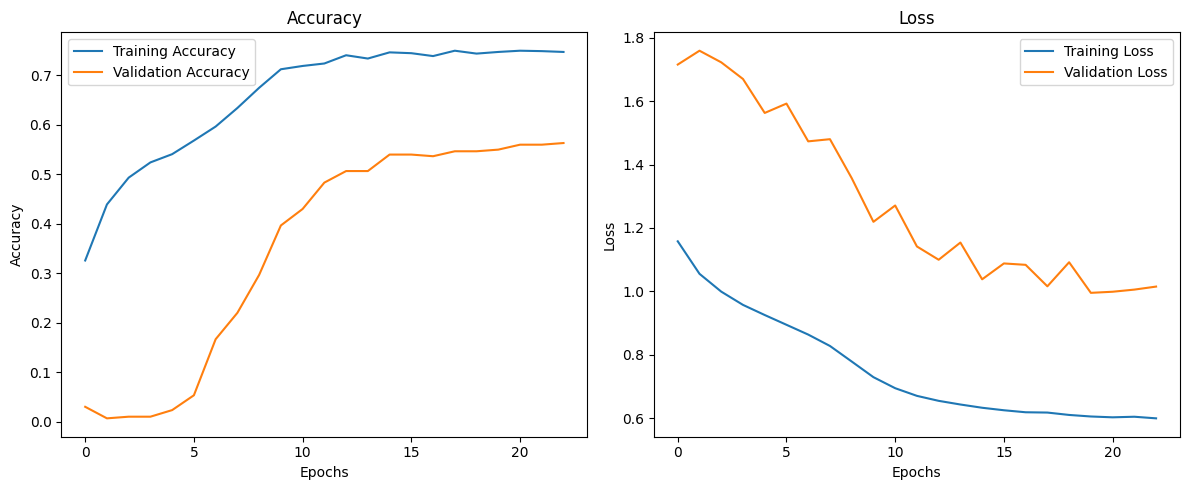

94/94 [==============================] - 36s 386ms/step


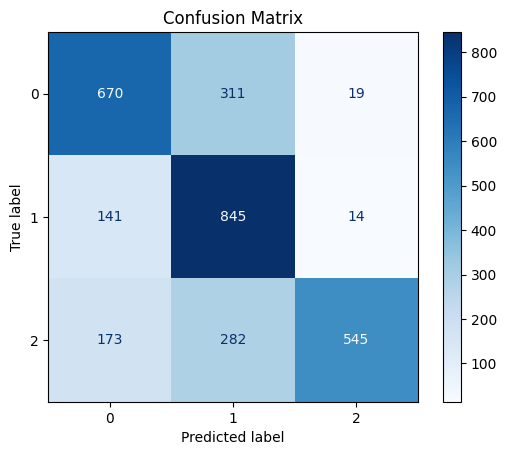

Precision: 0.7371
Recall: 0.6867
F1 Score: 0.6864


In [6]:
# FASHION MNIST 3 CLASSES 500 TAINING SAMPLES , NOISE =0.04 [ run ]
#
# =============================================================
# Imports
# =============================================================
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# =============================================================
# Load and preprocess dataset
# =============================================================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

selected_classes = [0, 1, 2]  # Digits 0 and 1
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Limit number of training samples per class
class_limit = 500
x_train_limited, y_train_limited = [], []

for cls in selected_classes:
    cls_indices = np.where(y_train == cls)[0][:class_limit]
    x_train_limited.append(x_train[cls_indices])
    y_train_limited.append(y_train[cls_indices])

x_train = np.concatenate(x_train_limited)
y_train = np.concatenate(y_train_limited)

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Resize images to 4x4 grid for 16 qubits
def preprocess_images(images, size=4):
    images = tf.image.resize(images[..., tf.newaxis], (size, size)).numpy()
    return images.reshape(-1, size**2)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# =============================================================
# Quantum Circuit Definitions
# =============================================================

# Create qubits and parameters
n_qubits = 16
layers = 3
qubits = [cirq.GridQubit(i, 0) for i in range(n_qubits)]
params = sympy.symbols(f'theta_0:{3*n_qubits*layers}')

# Define parameterized variational circuit
def create_quantum_circuit(qubits, params,layers):
    circuit = cirq.Circuit()
    for layer_num in range(layers):
      for i, qubit in enumerate(qubits):
          circuit.append(cirq.rz(params[i + layer_num] )(qubit))
          circuit.append(cirq.ry(params[i + len(qubits) + layer_num ] )(qubit))
          circuit.append(cirq.rz(params[i + 2*len(qubits) + 3*len(qubits)  + layer_num ])(qubit))
      for i in range(len(qubits) - 1):
          circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))
    return circuit





# Create example parameterized circuit
example_circuit = create_quantum_circuit(qubits, params, layers)

# =============================================================
# Noisy data encoding (adds Gaussian phase/amplitude noise)
# =============================================================
def create_quantum_data(images, noise_std=0.04):
    circuits = []
    for image in images:
        circuit = cirq.Circuit()
        for i, pixel in enumerate(image):
            noisy_pixel = pixel + np.random.normal(0, noise_std)
            noisy_pixel = np.clip(noisy_pixel, 0.0, 1.0)
            circuit.append(cirq.rx(np.pi * noisy_pixel)(qubits[i % n_qubits]))
        circuits.append(circuit)
    return tfq.convert_to_tensor(circuits)

# Convert datasets to noisy quantum circuits
x_train_circuits = create_quantum_data(x_train, noise_std=0.04)
x_test_circuits  = create_quantum_data(x_test, noise_std=0.00)

# =============================================================
# Model Definition
# =============================================================
def create_model():
    quantum_input = tf.keras.Input(shape=(), dtype=tf.string, name='quantum_input')
    quantum_layer = tfq.layers.PQC(example_circuit, [cirq.Z(q) for q in qubits])(quantum_input)
    output = tf.keras.layers.Dense(len(selected_classes), activation="softmax")(quantum_layer)
    model = tf.keras.Model(inputs=quantum_input, outputs=output, name='Quantum_Classifier')
    return model

# Learning rate and callbacks
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100, decay_rate=0.9
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_f_mnist_3_500_noise_0.04.h5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# =============================================================
# Compile and Train
# =============================================================
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_circuits, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[model_checkpoint, reduce_lr, early_stopping],
    verbose=1
)

model.load_weights("best_model_f_mnist_3_500_noise_0.04.h5")

# =============================================================
# Evaluation
# =============================================================
loss, accuracy = model.evaluate(x_test_circuits, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# =============================================================
# Visualization
# =============================================================
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test_circuits), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=range(len(selected_classes)))
ConfusionMatrixDisplay(cm, display_labels=selected_classes).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# =============================================================
# Metrics
# =============================================================
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training set shape: (3000, 28, 28)
Training labels shape: (3000,)
Test set shape: (3000, 28, 28)
Test labels shape: (3000,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


19/19 [==============================] - ETA: 0s - loss: 0.9953 - accuracy: 0.5025 
Epoch 1: val_loss improved from inf to 1.92401, saving model to best_model_f_mnist_3_1000_noise_0.04.h5
19/19 [==============================] - 204s 11s/step - loss: 0.9953 - accuracy: 0.5025 - val_loss: 1.9240 - val_accuracy: 0.0000e+00 - lr: 0.0098
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.8763 - accuracy: 0.5954 
Epoch 2: val_loss improved from 1.92401 to 1.54206, saving model to best_model_f_mnist_3_1000_noise_0.04.h5
19/19 [==============================] - 203s 11s/step - loss: 0.8763 - accuracy: 0.5954 - val_loss: 1.5421 - val_accuracy: 0.0317 - lr: 0.0096
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.8029 - accuracy: 0.6525 
Epoch 3: val_loss improved from 1.54206 to 1.39798, saving model to best_model_f_mnist_3_1000_noise_0.04.h5
19/19 [==============================] - 202s 11s/step - loss: 0.8029 - accuracy: 0.6525 - val_loss: 1.3980 - val_

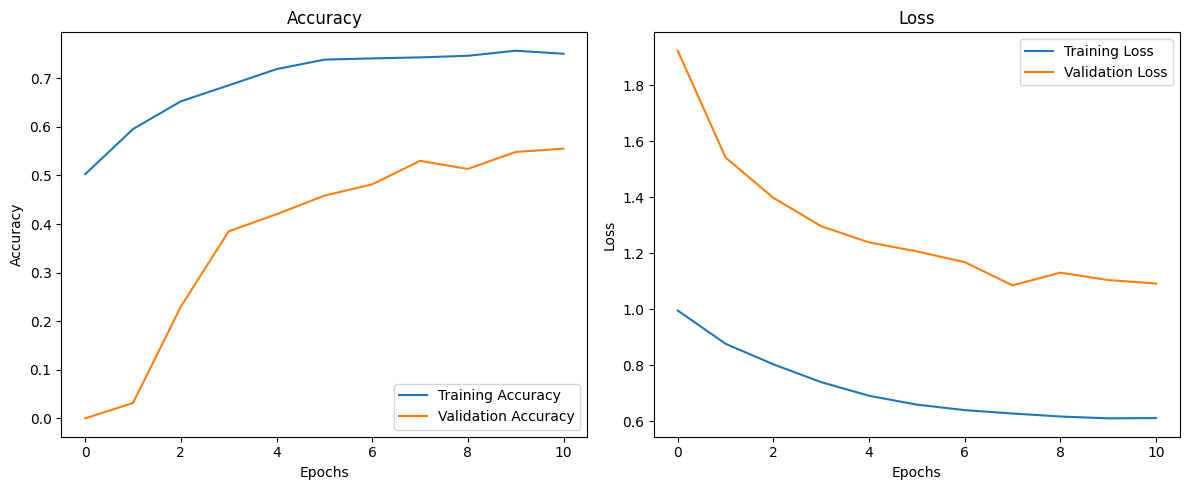

94/94 [==============================] - 36s 380ms/step


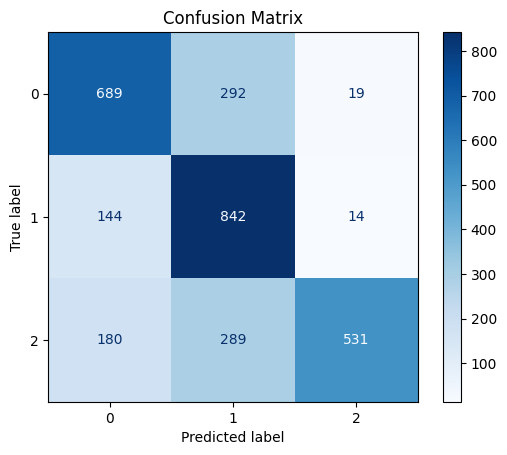

Precision: 0.7378
Recall: 0.6873
F1 Score: 0.6862


In [ ]:
# FASHION MNIST 3 CLASSES 1000 TRAINING SAMPLES ; NOISE = 0.04 [ run ]
#
# =============================================================
# Imports
# =============================================================
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# =============================================================
# Load and preprocess dataset
# =============================================================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

selected_classes = [0, 1, 2]  # Digits 0 and 1
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Limit number of training samples per class
class_limit = 1000
x_train_limited, y_train_limited = [], []

for cls in selected_classes:
    cls_indices = np.where(y_train == cls)[0][:class_limit]
    x_train_limited.append(x_train[cls_indices])
    y_train_limited.append(y_train[cls_indices])

x_train = np.concatenate(x_train_limited)
y_train = np.concatenate(y_train_limited)

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Resize images to 4x4 grid for 16 qubits
def preprocess_images(images, size=4):
    images = tf.image.resize(images[..., tf.newaxis], (size, size)).numpy()
    return images.reshape(-1, size**2)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# =============================================================
# Quantum Circuit Definitions
# =============================================================

# Create qubits and parameters
n_qubits = 16
layers = 3
qubits = [cirq.GridQubit(i, 0) for i in range(n_qubits)]
params = sympy.symbols(f'theta_0:{3*n_qubits*layers}')

# Define parameterized variational circuit
def create_quantum_circuit(qubits, params,layers):
    circuit = cirq.Circuit()
    for layer_num in range(layers):
      for i, qubit in enumerate(qubits):
          circuit.append(cirq.rz(params[i + layer_num] )(qubit))
          circuit.append(cirq.ry(params[i + len(qubits) + layer_num ] )(qubit))
          circuit.append(cirq.rz(params[i + 2*len(qubits) + 3*len(qubits)  + layer_num ])(qubit))
      for i in range(len(qubits) - 1):
          circuit.append(cirq.CZ(qubits[i], qubits[i + 1]))
    return circuit





# Create example parameterized circuit
example_circuit = create_quantum_circuit(qubits, params, layers)



# =============================================================
# Noisy data encoding (adds Gaussian phase/amplitude noise)
# =============================================================
def create_quantum_data(images, noise_std=0.04):
    circuits = []
    for image in images:
        circuit = cirq.Circuit()
        for i, pixel in enumerate(image):
            noisy_pixel = pixel + np.random.normal(0, noise_std)
            noisy_pixel = np.clip(noisy_pixel, 0.0, 1.0)
            circuit.append(cirq.rx(np.pi * noisy_pixel)(qubits[i % n_qubits]))
        circuits.append(circuit)
    return tfq.convert_to_tensor(circuits)

# Convert datasets to noisy quantum circuits
x_train_circuits = create_quantum_data(x_train, noise_std=0.04)
x_test_circuits  = create_quantum_data(x_test, noise_std=0.00)

# =============================================================
# Model Definition
# =============================================================
def create_model():
    quantum_input = tf.keras.Input(shape=(), dtype=tf.string, name='quantum_input')
    quantum_layer = tfq.layers.PQC(example_circuit, [cirq.Z(q) for q in qubits])(quantum_input)
    output = tf.keras.layers.Dense(len(selected_classes), activation="softmax")(quantum_layer)
    model = tf.keras.Model(inputs=quantum_input, outputs=output, name='Quantum_Classifier')
    return model

# Learning rate and callbacks
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100, decay_rate=0.9
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_f_mnist_3_1000_noise_0.04.h5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# =============================================================
# Compile and Train
# =============================================================
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_circuits, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[model_checkpoint, reduce_lr, early_stopping],
    verbose=1
)

model.load_weights("best_model_f_mnist_3_1000_noise_0.04.h5")

# =============================================================
# Evaluation
# =============================================================
loss, accuracy = model.evaluate(x_test_circuits, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# =============================================================
# Visualization
# =============================================================
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test_circuits), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=range(len(selected_classes)))
ConfusionMatrixDisplay(cm, display_labels=selected_classes).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# =============================================================
# Metrics
# =============================================================
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
